43.407077250432344
[-9.61160748e-02  4.70774501e-02 -1.10902220e-02  8.72136286e-01
 -2.07659999e+01  3.45613189e+00 -4.06049974e-03 -1.71573040e+00
  2.75496048e-01 -1.20220677e-02 -1.05032131e+00  8.37373951e-03
 -4.58128282e-01]
使用LinearRegression模型的均方误差为: 27.286689268331507
使用交叉验证的均方误差为: 34.53965953999317
[31.36234122]


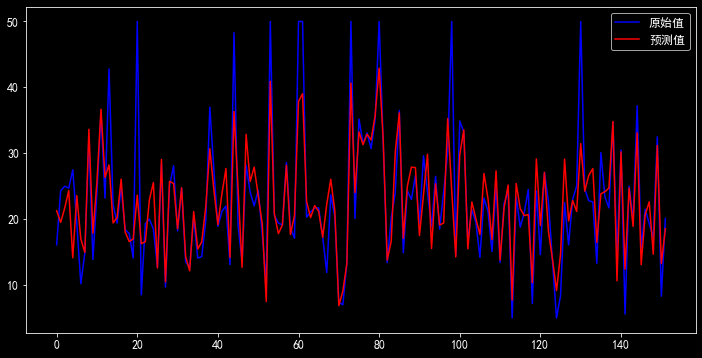

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn import svm
import joblib
#导入波士顿房价数据
boston=load_boston()
x=boston['data']##获得数据集中的输入
y=boston['target']##获得数据集中的输出，即标签(也就是类别)
names=boston['feature_names']##获取数据集的属性

# 将数据分成训练集（0.7）和测试集（0.3）
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=125)

#建立线性回归模型,并将训练数据传入开始训练
clf=LinearRegression().fit(x_train,y_train)
print(clf.intercept_)
print(clf.coef_)
#预测测试集数据
y_pred=clf.predict(x_test)

#绘制对比折线图，观察回归效果
#设置绘图参数
fig=plt.figure(figsize=(12,6))
plt.rcParams['font.family']="sans-serif"
plt.rcParams['font.sans-serif']="SimHei"
plt.rcParams['font.size']=12
plt.rcParams['axes.unicode_minus']=False
#绘制图线
plt.plot(range(y_test.shape[0]),y_test,color='blue',linewidth=1.5)
plt.plot(range(y_test.shape[0]),y_pred,color='red',linewidth=1.5)
plt.legend(['原始值','预测值'])


#对于回归模型的评价我们一般会用MSE(均方误差)
print("使用LinearRegression模型的均方误差为:",mean_squared_error(y_test, y_pred))

#同时采用交叉验证的方法进行评价
#将数据集分为10组(一般均分)，然后每次选择一组作为验证集，其余九组作为训练集。
predicted = cross_val_predict(clf,x,y,cv=10)
print("使用交叉验证的均方误差为:",mean_squared_error(y, predicted))

#保存Model(注:save文件夹要预先建立，否则会报错)
joblib.dump(clf, 'clf.pkl')

#读取Model
clf3 = joblib.load('clf.pkl')

#测试读取后的Model
print(clf3.predict(x_train[0:1]))

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

# X为输入，y为输出
X = boston.data
y = boston.target

# 加载的数据以字典的形式存储，获取数据对应的字典索引即可
keys = boston.keys()

# 所加载到的数据为ndarray类型，将其转换为DataFrame类型
import pandas as pd

# 使用上面找到的feature_names
col = boston['feature_names']

# 转换为DataFrame
x_ = pd.DataFrame(X, columns=col)
y_ = pd.DataFrame(y, columns=['MEDV'])

# 完整数据集
dataset = pd.concat([x_, y_], axis=1)

# 对显示进行设置
pd.set_option('precision', 1)

# 查看数据集描述
print(dataset.describe())

# 查看关联关系
pd.set_option('precision', 2)
#print(dataset.corr(method='pearson'))


          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  
